In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_dir = os.path.join('output', 'guandu')

In [20]:
df1 = pd.read_csv(os.path.join(csv_dir, 'geosmin_2020-01-26_2020-03-18.csv'), index_col='date')

In [27]:
df1.loc[df1.is_capture_geosmin_ub, 'capture_geosmin'] = np.nan
df1.loc[df1.is_etas_geosmin_ub, 'etas_geosmin'] = np.nan
df1.drop(columns=['is_capture_geosmin_ub', 'is_etas_geosmin_ub'], inplace=True)

In [22]:
df2 = pd.read_csv(os.path.join(csv_dir, 'geosmin_2020-10-23_today.csv'), index_col='date')

In [28]:
df2.loc[df2.is_capture_geosmin_ub, 'capture_geosmin'] = np.nan
df2.loc[df2.is_veta_geosmin_ub, 'veta_geosmin'] = np.nan
df2.loc[df2.is_neta_geosmin_ub, 'neta_geosmin'] = np.nan
df2.drop(columns=['is_capture_geosmin_ub', 'is_veta_geosmin_ub', 'is_neta_geosmin_ub'], inplace=True)

In [37]:
df = pd.concat([df1, df2])

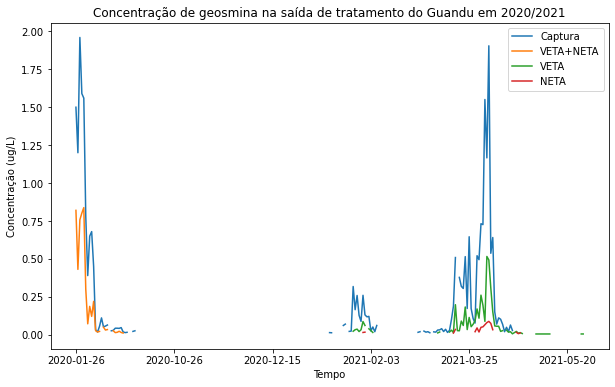

In [54]:
df.plot(figsize=[10,6])
plt.title('Concentração de geosmina na saída de tratamento do Guandu em 2020/2021')
plt.xlabel('Tempo')
plt.ylabel('Concentração (ug/L)')
leg = plt.legend()
leg_texts = leg.get_texts()
leg_texts[0].set_text('Captura')
leg_texts[1].set_text('VETA+NETA')
leg_texts[2].set_text('VETA')
leg_texts[3].set_text('NETA')
plt.show()

In [55]:
edf = pd.DataFrame(data={
    'env': 100 * (1 - df.etas_geosmin / df.capture_geosmin),
    'en': 100 * (1 - df.neta_geosmin / df.capture_geosmin),
    'ev': 100 * (1 - df.veta_geosmin / df.capture_geosmin),
})

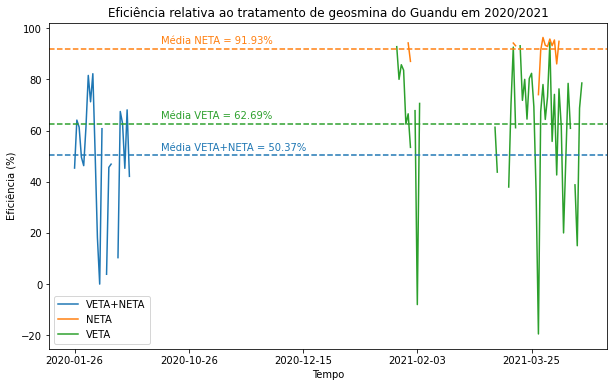

In [87]:
ax = edf.plot(figsize=[10,6])
trans = ax.get_yaxis_transform()
env_mean = edf.env.mean()
plt.text(.2, env_mean+2, 'Média VETA+NETA = {:.2f}%'.format(env_mean), transform=trans, c='tab:blue')
plt.axhline(y=env_mean, c='tab:blue', linestyle='--')
en_mean = edf.en.mean()
plt.text(.2, en_mean+2, 'Média NETA = {:.2f}%'.format(en_mean), transform=trans, c='tab:orange')
plt.axhline(y=en_mean, c='tab:orange', linestyle='--')
ev_mean = edf.ev.mean()
plt.text(.2, ev_mean+2, 'Média VETA = {:.2f}%'.format(ev_mean), transform=trans, c='tab:green')
plt.axhline(y=ev_mean, c='tab:green', linestyle='--')
plt.title('Eficiência relativa ao tratamento de geosmina do Guandu em 2020/2021')
plt.xlabel('Tempo')
plt.ylabel('Eficiência (%)')
leg = plt.legend()
leg_texts = leg.get_texts()
leg_texts[0].set_text('VETA+NETA')
leg_texts[1].set_text('NETA')
leg_texts[2].set_text('VETA')
plt.show()